In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime
import requests
from io import BytesIO
import statsmodels.tsa.api as smt

In [3]:
url = 'https://raw.githubusercontent.com/oderofrancis/rona/main/Countries-Continents.csv'
test_data = pd.read_csv(url)
test_data.head()

,Continent,Country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina Faso


In [4]:
# Dataset
wpi1 = requests.get('http://www.stata-press.com/data/r12/wpi1.dta').content
data = pd.read_stata(BytesIO(wpi1))
data.index = data.t

In [5]:
data

,wpi,t,ln_wpi
t,,,
1960-01-01,30.700001,1960-01-01,3.424263
1960-04-01,30.799999,1960-04-01,3.427515
1960-07-01,30.700001,1960-07-01,3.424263
1960-10-01,30.700001,1960-10-01,3.424263
1961-01-01,30.799999,1961-01-01,3.427515
...,...,...,...
1989-10-01,109.400002,1989-10-01,4.695011
1990-01-01,111.000000,1990-01-01,4.709530
1990-04-01,110.800003,1990-04-01,4.707727


## Fitting SARIMAX model fitting

In [6]:
mod = sm.tsa.statespace.SARIMAX(data['wpi'], trend='c', order=(1,1,1))

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [7]:
res = mod.fit(disp=False)
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                    wpi   No. Observations:                  124
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -135.351
Date:                Tue, 17 May 2022   AIC                            278.703
Time:                        06:35:15   BIC                            289.951
Sample:                    01-01-1960   HQIC                           283.272
                         - 10-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0943      0.068      1.389      0.165      -0.039       0.227
ar.L1          0.8742      0.055     16.028      0.000       0.767       0.981
ma.L1         -0.4120      0.100     -4.119      0.0

In [8]:
predict = res.get_prediction()

In [9]:
data['ln_wpi'] = np.log(data['wpi'])
data['D.ln_wpi'] = data['ln_wpi'].diff()

In [10]:
data.head(10)

,wpi,t,ln_wpi,D.ln_wpi
t,,,,
1960-01-01,30.700001,1960-01-01,3.424263,NaN
1960-04-01,30.799999,1960-04-01,3.427515,0.003252
1960-07-01,30.700001,1960-07-01,3.424263,-0.003252
1960-10-01,30.700001,1960-10-01,3.424263,0.000000
1961-01-01,30.799999,1961-01-01,3.427515,0.003252
1961-04-01,30.500000,1961-04-01,3.417727,-0.009788
1961-07-01,30.500000,1961-07-01,3.417727,0.000000
1961-10-01,30.600000,1961-10-01,3.421000,0.003273
1962-01-01,30.700001,1962-01-01,3.424263,0.003263


In [11]:
data.tail(5)

,wpi,t,ln_wpi,D.ln_wpi
t,,,,
1989-10-01,109.400002,1989-10-01,4.695011,0.003663
1990-01-01,111.000000,1990-01-01,4.709530,0.014519
1990-04-01,110.800003,1990-04-01,4.707727,-0.001803
1990-07-01,112.800003,1990-07-01,4.725616,0.017889
1990-10-01,116.199997,1990-10-01,4.755313,0.029696


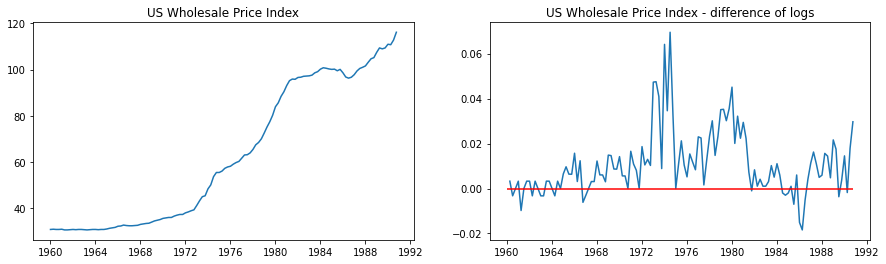

In [12]:
# Graph data
fig, axes = plt.subplots(1, 2, figsize=(15,4))

axes[0].plot(data.index._mpl_repr(), data['wpi'], '-')
axes[0].set(title='US Wholesale Price Index')

# Log difference
axes[1].plot(data.index._mpl_repr(), data['D.ln_wpi'], '-')
axes[1].hlines(0, data.index[0], data.index[-1], 'r')
axes[1].set(title='US Wholesale Price Index - difference of logs');

/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


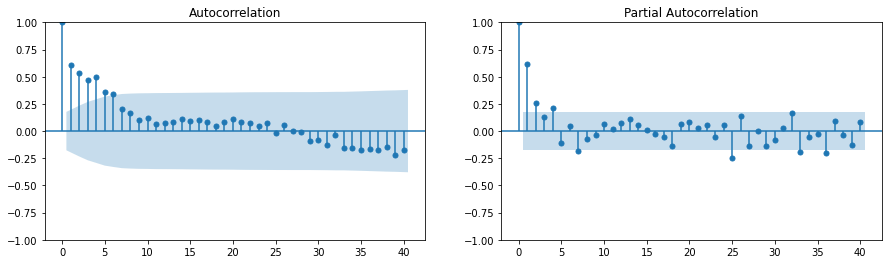

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(15,4))

fig = sm.graphics.tsa.plot_acf(data.iloc[1:]['D.ln_wpi'],lags=40,ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(data.iloc[1:]['D.ln_wpi'],lags=40,ax=axes[1])

In [14]:
# Fit the model
mod = sm.tsa.statespace.SARIMAX(data['ln_wpi'], trend='c', order=(1,1,1))
res = mod.fit(disp=False)
print(res.summary())

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 ln_wpi   No. Observations:                  124
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 382.427
Date:                Tue, 17 May 2022   AIC                           -756.854
Time:                        06:39:42   BIC                           -745.605
Sample:                    01-01-1960   HQIC                          -752.284
                         - 10-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0012      0.001      1.310      0.190      -0.001       0.003
ar.L1          0.8845      0.043     20.688      0.000       0.801       0.968
ma.L1         -0.4789      0.092     -5.208      0.0

In [36]:
x = data['ln_wpi']
# %time est_order = smt.AR(x).select_order(maxlag=30, ic='aic', trend='nc')
%time est_order = sm.tsa.arma_order_select_ic(x,ic='aic', trend='c')

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals

CPU times: user 9.68 s, sys: 7.24 s, total: 16.9 s
Wall time: 5.46 s


/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [37]:
est_order

{'aic':             0           1           2
 0  183.461619   22.855126 -129.280206
 1 -631.940786 -680.855247 -707.140223
 2 -732.609216 -749.530985 -746.452583
 3 -743.075225 -747.149647 -643.905132
 4 -744.429831 -742.306526 -729.968381,
 'aic_min_order': (2, 1)}

In [38]:
res.params

intercept    0.001246
ar.L1        0.884492
ma.L1       -0.478858
sigma2       0.000116
dtype: float64

In [39]:
mod.filter(res.params).get_prediction().predicted_mean

1960-01-01    0.010787
1960-04-01    3.435049
1960-07-01    3.433691
1960-10-01    3.426742
1961-01-01    3.426672
                ...   
1989-10-01    4.698411
1990-01-01    4.701125
1990-04-01    4.719594
1990-07-01    4.713060
1990-10-01    4.736673
Freq: QS-OCT, Name: predicted_mean, Length: 124, dtype: float64

In [40]:
data['prediction']= res.get_prediction(start=120, end=130).predicted_mean

In [41]:
predicted_df = pd.DataFrame(res.get_prediction(start=0, end=130).predicted_mean)

In [42]:
predicted_df['predicted_mean'] = np.exp(predicted_df['predicted_mean'])

In [43]:
predicted_df.tail()

,predicted_mean
1991-07-01,122.544352
1991-10-01,124.543702
1992-01-01,126.496789
1992-04-01,128.409680
1992-07-01,130.287939


In [44]:
df2 = pd.concat([data,predicted_df],axis=1)
df2.tail(20)

,wpi,t,ln_wpi,D.ln_wpi,prediction,predicted_mean
1987-10-01,101.000000,1987-10-01,4.615120,0.004963,NaN,101.599118
1988-01-01,101.599998,1988-01-01,4.621044,0.005923,NaN,101.858865
1988-04-01,103.199997,1988-04-01,4.636669,0.015625,NaN,102.385710
1988-07-01,104.699997,1988-07-01,4.651099,0.014431,NaN,104.369920
1988-10-01,105.199997,1988-10-01,4.655863,0.004764,NaN,106.016711
1989-01-01,107.500000,1989-01-01,4.677491,0.021627,NaN,106.168370
1989-04-01,109.400002,1989-04-01,4.695011,0.017520,NaN,109.059894
1989-07-01,109.000000,1989-07-01,4.691348,-0.003663,NaN,111.081328
1989-10-01,109.400002,1989-10-01,4.695011,0.003663,NaN,109.772653
1990-01-01,111.000000,1990-01-01,4.709530,0.014519,4.701125,110.070963


<AxesSubplot:>

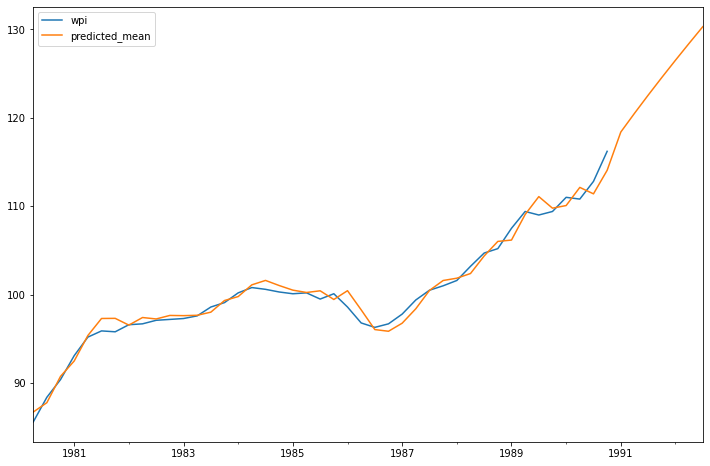

In [45]:
df2.loc[df2.index > '1980-01-01'][['wpi','predicted_mean']].plot(figsize=(12,8))

In [46]:
def mape(y_true, y_pred):
    y_true,y_pred = np.array(y_true),np.array(y_pred)
    return np.round(np.mean(np.abs((y_true-y_pred)/y_true))*100,2)

def rmse(y_true, y_pred):
    y_true,y_pred = np.array(y_true),np.array(y_pred)
    return np.sqrt(np.mean(np.square(np.subtract(y_true,y_pred)))).round(2)

In [47]:
y_true = df2.loc[df2.index <= '1990-10-01']['wpi']
y_pred = df2.loc[df2.index <= '1990-10-01']['predicted_mean']
mape(y_true, y_pred)


1.54

In [48]:
rmse(y_true, y_pred)

2.76

In [49]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_true, y_pred)
np.sqrt(MSE)

2.7624566793073386